In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
Data = pd.read_csv('/home/dimitriskana/workspace/Project_Aging_meat/abalone.data.csv', names=['Sex', 'Length', 'Diameter',
'Height', 'Whole Weight', 'Shucked Weight', 'Viscera Weight','Shell Weight', 'Rings'])
# Calculate the volume because It may be easier to make a prediction based on volume
#Data['Volume'] = Data['Height']*Data['Diameter']*Data['Length']

array([[<AxesSubplot: xlabel='Length', ylabel='Length'>,
        <AxesSubplot: xlabel='Diameter', ylabel='Length'>,
        <AxesSubplot: xlabel='Height', ylabel='Length'>,
        <AxesSubplot: xlabel='Whole Weight', ylabel='Length'>,
        <AxesSubplot: xlabel='Shucked Weight', ylabel='Length'>,
        <AxesSubplot: xlabel='Viscera Weight', ylabel='Length'>,
        <AxesSubplot: xlabel='Shell Weight', ylabel='Length'>,
        <AxesSubplot: xlabel='Rings', ylabel='Length'>,
        <AxesSubplot: xlabel='Volume', ylabel='Length'>],
       [<AxesSubplot: xlabel='Length', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Diameter', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Height', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Whole Weight', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Shucked Weight', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Viscera Weight', ylabel='Diameter'>,
        <AxesSubplot: xlabel='Shell Weight', ylabel='Diameter'>,
        <AxesS

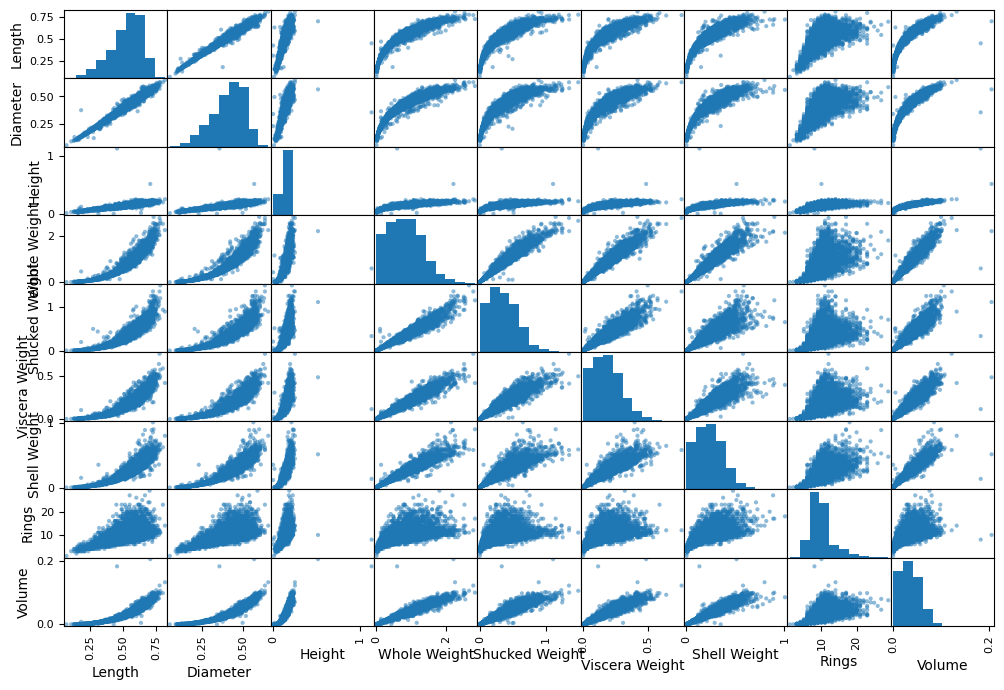

In [3]:
pd.plotting.scatter_matrix(Data,figsize = (12,8))

As we can see there is hints of corellation between the different columns (attributes of each individual). 
The data are continous so we may try the Linear Regrassion as approach. 

In [4]:
# we need to one-hot encode the categorical data
one_hot = pd.get_dummies(Data['Sex'])
Data = Data.drop(['Sex'], axis =1).join(one_hot)

X = Data.copy().drop('Rings', axis = 1).to_numpy()
y = Data['Rings'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.33, random_state=1234)


In [5]:
#logistic_Regression
from Linear_Torch import Log_Reg as LR
# lr starts at 0.001 by default and epochs at 100
d = LR( lr = 0.0001, epochs = 20000 )
d.fit(X_train,y_train)



epoch: 10, loss = 106.0431
epoch: 20, loss = 104.9246
epoch: 30, loss = 103.8189
epoch: 40, loss = 102.7257
epoch: 50, loss = 101.6451
epoch: 60, loss = 100.5767
epoch: 70, loss = 99.5205
epoch: 80, loss = 98.4763
epoch: 90, loss = 97.4441
epoch: 100, loss = 96.4236
epoch: 110, loss = 95.4147
epoch: 120, loss = 94.4173
epoch: 130, loss = 93.4313
epoch: 140, loss = 92.4565
epoch: 150, loss = 91.4929
epoch: 160, loss = 90.5402
epoch: 170, loss = 89.5983
epoch: 180, loss = 88.6672
epoch: 190, loss = 87.7467
epoch: 200, loss = 86.8367
epoch: 210, loss = 85.9370
epoch: 220, loss = 85.0477
epoch: 230, loss = 84.1684
epoch: 240, loss = 83.2991
epoch: 250, loss = 82.4398
epoch: 260, loss = 81.5902
epoch: 270, loss = 80.7504
epoch: 280, loss = 79.9201
epoch: 290, loss = 79.0992
epoch: 300, loss = 78.2877
epoch: 310, loss = 77.4855
epoch: 320, loss = 76.6924
epoch: 330, loss = 75.9083
epoch: 340, loss = 75.1331
epoch: 350, loss = 74.3668
epoch: 360, loss = 73.6092
epoch: 370, loss = 72.8603
epoc

In [6]:
y_pred = d.predict(X_test, y_test).numpy()
acc = accuracy_score(y_test, y_pred)
print(f'The accuracy of the model is : {acc :.4f}')
print(f'The mean value of the score cross-validated data is: {d.eval() :.4f}')


The accuracy of the model is : 0.1958
The mean value of the score cross-validated data is: 7.8857


As we can see the results arent that promising. We will pursue different techniques after some hyperparameter tuning